### Trabalho Final GCC-108 - Teoria da Computação ###


Prof.: Douglas H. S. Abreu

Nome: Isabela Cristina de Jesus

Turma: 14A

Link do repositório GitHub: https://github.com/IsabelaCJesus/Trabalho-GCC-108.git


#### Exercício 1) Descreva com suas palavras uma estratégia para o desenvolvimento de uma maquina de Turing que compute a soma de 2 numeros binário.

Primeiramente deve-se realizar a conversão dos 2 números binários em unários para depois usá-los como entrada para a máquina de Turing. Essa conversão pode ser feita da seguinte maneira: converte-se os binários para decimais e depois esses decimais para unário.
Por exemplo o número 1111 = 15 em decimal e igual a 1111111111111111 (sequência de 16 1’s) em unário.
Depois disso deve-se considerar que 1 + 11 = 11, ou seja, se utilizarmos a estratégia de concatenar os 1’s das duas parcelas da soma sempre haverá um 1 a mais. Isso ocorre pois um dígito 1 representa o número zero, dois dígitos 1 representam o número um e assim sucessivamente.
A máquina a ser desenvolvida segue essa estratégia de concatenação: 
Ela percorre a fita trocando 1’s por 1’s até encontrar um □, quando encontra significa que percorreu a primeira parcela da soma. 
Estando nesse □  troca ele por 1 e percorre o restante da fita trocando 1’s por 1’s até achar outro □. Quando encontra outro □ significa que foi percorrida a segunda parcela da soma e que a configuração atual da fita é:
 
primeiro valor (em forma de sequência de 1’s) + 1 + segundo valor (em forma de sequência de 1’s) 

Percebe-se que, como na configuração atual da fita existe um 1 separando os dois valores a serem somados, portanto teremos que retirar dois 1’s  (o do zero, que foi mencionado inicialmente, e o de separação das parcelas) para que se tenha o resultado da soma.

Portanto, estando no primeiro □ depois da segunda parcela da soma, a cabeça de leitura é movida para a esquerda e troca-se os dois últimos 1’s por □ . 
Ao rebobinar toda a fita para a esquerda até chegar ao início da fita, teremos então o resultado da soma escrito na fita.





#### Exercício 2) Faça o esboço por meio de desenho da máquina de Turing proposta.

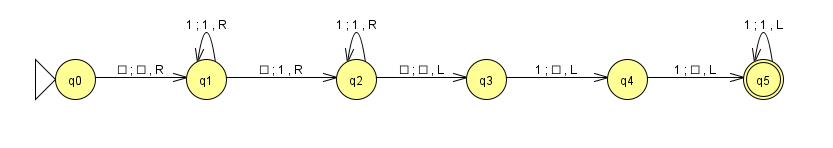




#### Exercício 3) Defina a MT como uma quíntupla M=(Q,Σ,Γ,δ,q_0):

Q = {q0, q1, q2, q3, q4, q5}

Σ = {□,1} - conjunto de dois binários convertidos para unário

Γ = {□,1}

δ(q0,B)→(q1,B,R)

δ(q1,1)→(q1,1,R)

δ(q1,B)→(q2,1,R)

δ(q2,1)→(q2,1,R)

δ(q2,B)→(q3,B,L)

δ(q3,1)→(q4,B,L)

δ(q4,1)→(q5,B,L)

δ(q5,1)→(q5,1,L)

estado_inicial: q0


#### Exercício 4) Faça a conversão de M em R(M)


<table>
    <tr>
        <td>Transição</td>
        <td>Codificação</td>
    </tr>
    <tr>
        <td>δ(q0,B)→(q1,B,R)</td>
         <td> 101110110111011</td>
    </tr>
    <tr>
        <td>δ(q1,1)→(q1,1,R)</td>
         <td> 11011011011011</td>
    </tr>
    <tr>
        <td>δ(q1,B)→(q2,1,R)</td>
         <td>1101110111011011</td>
    </tr>
    <tr>
        <td>δ(q2,1)→(q2,1,R)</td>
        <td> 1110110111011011</td>
    </tr>
    <tr>
        <td>δ(q2,B)→(q3,B,L)</td>
         <td>111011101111011101</td>
    </tr>
    <tr>
        <td>δ(q3,1)→(q4,B,L)</td>
        <td>1111011011111011101</td>
    </tr>
      <tr>
        <td>δ(q4,1)→(q5,B,L)</td>
         <td> 111110110111111011101</td>
    </tr>
    <tr>
        <td>δ(q5,1)→(q5,1,L)</td>
        <td>111111011011111101101</td>
    </tr>
    
</table>


Codificação da MT Universal:

0001011101101110110011011011011011001101110111011011001110110111011011001110111011110111010011110110111110111010011111011011111101110100111111011011111101101








#### Exercício 5) Desenvolva uma função MTU que receba R(M) acrescido de uma entrada w, onde w é um arquivo csv que contem dois números binário. A saída da função MTU deve ser a computação de M para uma entrada w.



In [1]:
import pandas as pd
entradaArq = pd.read_csv('exemplo2.CSV')
for row in entradaArq:
    dado = row
dado = list(dado.split(';'))

dado[0] = int(dado[0],2) #primeiro valor da entrada (em decimal)
dado[1] = int(dado[1],2) #segundo valor da entrada (em decimal)

valor1 = "1"
for i in range(dado[0]):
    valor1 = valor1 + "1" #primeiro valor da entreada (em unário)

valor2 = "1"
for i in range(dado[1]):
    valor2 = valor2 + "1"
    
entrada = valor1 + '0' + valor2 #segundo valor da entreada (em unário)

fita3 = entrada     #entrada
 
configuracao = "0001011101101110110011011011011011001101110111011011001110110111011011001110111011110111010011110110111110111010011111011011111101110100111111011011111101101"
maquina = configuracao.split("000")

maquina2 = maquina[1] # configuraçao da maquina

transicoes = maquina2.split("00") #transicoes

fita1 = transicoes  #transicoes
fita2 = "1"         #estado inicial
D = "1"             #direcao direita da maquina 
E = "11"            #direcao esquerda da maquina 


#### Exercício 6)

#### A) Explique a Tese de Chuch-Turing de forma sucinta

A tese de Chuch-Turing diz que se um cálculo puder ser feito de forma automatizada então também pode ser feito por uma máquina de Turing. Essa forma automatizada se refere a um algoritmo, ou seja, por um dado método, num número finito de passos.




#### B) Dada uma máquina de Turing arbitrária M e uma string de entrada w, a computação de M com entrada w irá parar em menos de 100 transições? Descreva uma máquina de Turing que resolva esse problema de decisão.

O problema da parada para máquinas deTuring é indecidível. Um problema indecidível é um problema de decisão em que é impossível construir um algoritmo que sempre responde corretamente sim ou não, dessa maneira, pela Tese de Chuch-Turing, como não é possível construir um algoritmo então não existe uma Máquina de Turing que resolva o problema.



#### C) Motre a solução para cada um dos seguintes sitemas de correspondência de Post:

#### a) (a, aa), (bb, b), (a, bb)


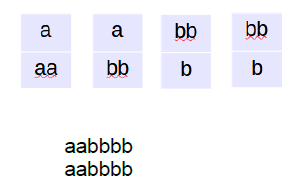


#### b) (a, ab), (ba, aba), (b, aba), (bba, b)

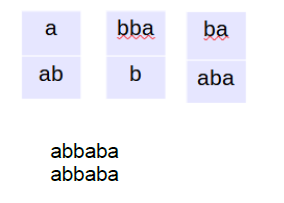


#### c) (abb, ab), (aba, ba), (aab,a bab)

Não tem solução.
Para iniciar só tem uma opção: (abb, ab)
Continuando a sequência chega-se em dois caminhos sem continuação:

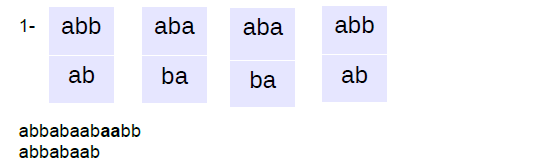

Não existe uma sequência com <b>aa</b> em cima.

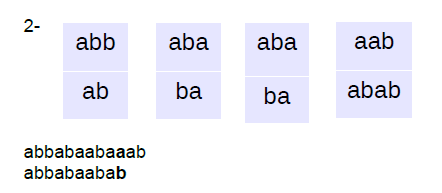

Diferentes!

#### d) (ab,aba), (baa, aa), (aba, baa)
Não tem solução.
Para iniciar só tem uma opção: (ab, aba)
Continuando a sequência chega-se em uma situação de “loop” pois (aba, baa) é repetido infinitivamente pois nenhuma outra combinação se encaixa na situação e nunca chega a uma situação onde as duas sequências são iguais.

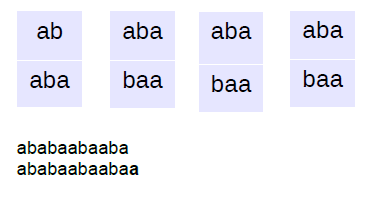

#### e) (a, aaa), (aab, b), (abaaa, ab)
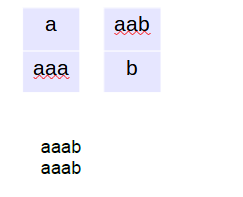


#### f) (ab, bb), (aa, ba),(ab, abb), (bb, bab)

Não tem solução.
Para iniciar só tem uma opção: (ab, abb)

Continuando a sequência chega-se em quatro situações onde é necessário <b>ba</b> na sequência superior. Como não existe uma combinação com <b>ba</b> na parte superior, não é possível continuar as situações.

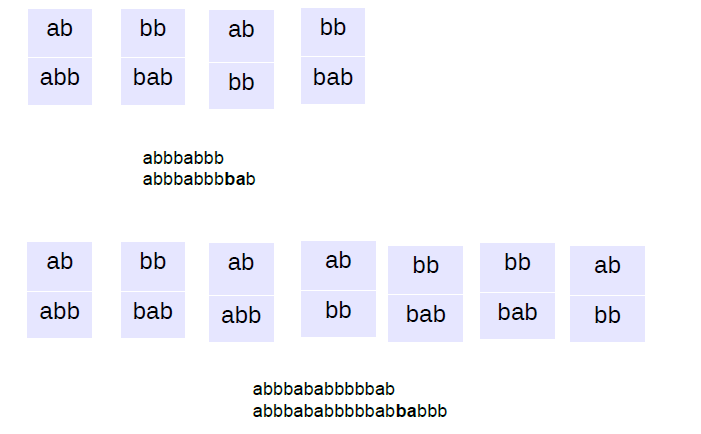

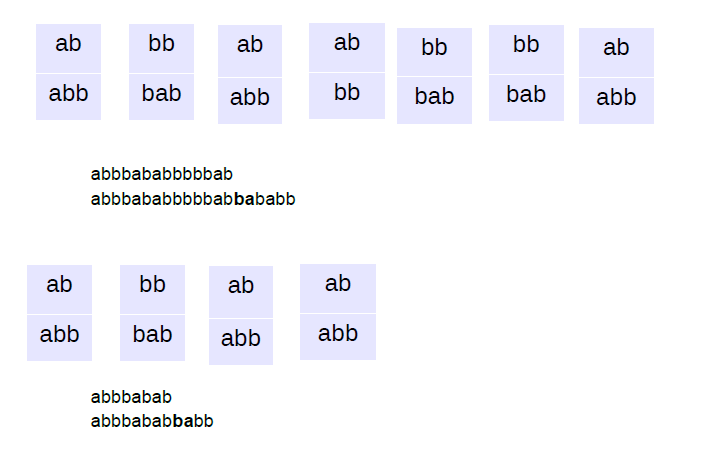

#### D) a) Prove que a função é primitiva recursiva

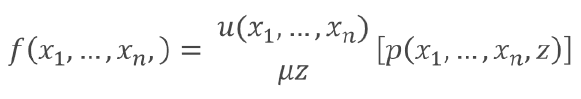


Sabe-se que uma função é recursiva primitiva se pode ser obtida das funções sucessora, zero e de projeção por um número finito de aplicações como composição e recursão primitiva .
Se $$f(x_1, …, x_n, z)$$ é um predicado recursivo primitivo, e $$u(x_1, …, x_n)$$ uma função recursiva primitiva, então a função apresentada é recursiva primitiva.




#### b) Defina o valor "passo a passo" de gn(4,1,0,2,1)

$$𝑔𝑛(4,1,0,2,1) = 𝑝𝑛(0)^{4+1} ∗ 𝑝𝑛(1)^{1+1} * 𝑝𝑛(2)^{0+1} ∗ 𝑝𝑛(3)^{2+1} * 𝑝𝑛(4)^{1+1}$$
$$= 2^5 * 3^2 * 5^1 * 7^3 * 11^2 = 59764320$$

#### E) a) Dado f(x) = 3x² + 4x + 6 e g(x) = 5x²

#### Prove que g(x) ∈ O(f) e f(x) ∈ O(g)


Temos que f(x) e g(x) são funções quadráticas.
Logo $$f(x) ∈ O(n^2)$$ 
e $$g(x) ∈ O(n^2)$$
Assim pode-se afirmar que  g(x) ∈ O(f) e que f(x) ∈ O(g)


#### b) Qual é a complexidade e o "big O" de M'?
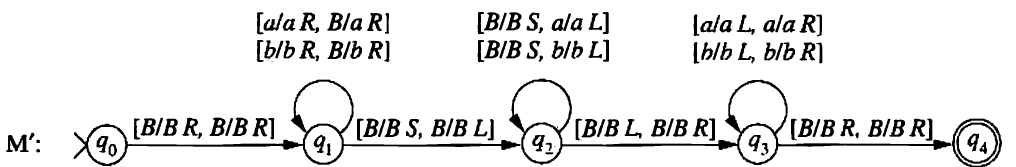

M' aceita o conjunto de palíndromos sobre Σ = {𝑎,𝑏} e possui duas fitas. 

Seu funcionamento:

1- percorre a entrada que está na fita 1 e faz uma cópia dela na fita 2.

2- move a cabeça de leitura da fita 2 para a posição inicial

3- move as duas cabeças de leitura percorrendo a entrada, sendo a da fita 1 para a esquerda e a da fita 2 para a direita, comparando os símbolos das duas fitas.

Se a entrada não for um palíndromo em um momento as duas cabeças de leitura estarão apontando, ao mesmo tempo, para símbolos diferentes e a computação irá parar em um estado que não é de aceitação.
Se a entrada for um palíndromo em um momento as duas cabeças de leitura estarão apontando, ao mesmo tempo, para brancos e a computação irá parar em um estado de aceitação (que é o número máximo de transições).

Portando, para uma entrada de tamanho n ser aceita, a computação completa os três passos: copiar, voltar e comparar

Contando o número de transições a cada passo, tem-se que a complexidade de tempo de M'  é $$M'(n) = 3(n + 1) + 1$$

E seu big O é O(n)